# Vitber prosjekt - teknisk fysikk
##### _Hvorfor sank Vasaskipet?_

Innledning: 

In [2]:
#Inportering av relevante filer
%matplotlib inline

import numpy as np
from math import factorial
import matplotlib.pyplot as plt

#Constant parametes 
sigma_0 = 1000              #water density [kg/m^2] 
sigma = 500                 #Ship density [kg/m^2] 
R = 10                      #Ship radius [m]
A_s = 1/2 * np.pi * R**2    #Ship cross section 
m = A_s * sigma      #Ship's mass per length unit (in z direcion)
A_0 = sigma*np.pi*R**2 / (2*sigma_0)
I_c = 1/2 * m * R**2 * (1-(32)/(9*np.pi**2)) #Ships moment of intertia      #/(9*np.pi**2) Legg til for riktig I_c
g = -981/100          #Gravitational acceleration9*np.pi**2))   
h = 0.42* R                 #Distanve from center of mass to physical senter
w_0 = np.sqrt(m*g*h/I_c)

C:\Users\3rlen\AppData\Local\Temp\ipykernel_7372\3702303274.py:18: RuntimeWarning: invalid value encountered in sqrt
  w_0 = np.sqrt(m*g*h/I_c)


## Oppgave 1:
##### 1a) 

Bruker newtons metode for å finne sektorvinkelen ved å løse ligning (3) fra oppgaveteskten: 
$$ \beta - sin(\beta) = \pi \frac{\sigma}{\sigma _0} = \pi \frac{500}{1000} = \frac{\pi}{2}.$$
Hvor $\sigma = 500$ og $\sigma _0 = 1000$ er gitt i oppgaveteksten. 
 
Funksjonen _newton_ er hentet fra nonlinearequations.py brukt i forelesning.

In [3]:
#Oppgave 1b)
def newton(f, df, x0, m = 0, tol=1.e-8, max_iter=30):
    ''' Solve f(x)=0 by Newtons method
        The output of each iteration is printed
        Input:
        f, df:   The function f and its derivate f'.
        x0:  Initial values
        tol: The tolerance
      Output:
        The root and the number of iterations
    '''
    x = x0
    #print(f"k ={0:3d}, x = {x:18.15f}, f(x) = {f(x):10.3e}")
    for k in range(max_iter):
        fx = f(x,m)
        if abs(fx) < tol:           # Aksepterer løsningne 
            break 
        x = x - fx/df(x)            # Newton-iterasjon
        #print(f"k ={k+1:3d}, x = {x:18.15f}, f(x) = {f(x):10.3e}")
    return x, k+1

def f3(x, m=0):
    sigma_m = m/(1/2 *np.pi*R**2)
    return x - np.sin(x) -np.pi*((sigma+sigma_m)/sigma_0)

def df3(x):
    return 1-np.cos(x)

def get_beta(m=0): #Hvor m=load mass. Brukes til oppgave 2
    beta, its = newton(f3, df3, 1 , m, tol=1.e-8, max_iter=30)
    return beta

In [4]:
beta, its = newton(f3, df3, 1, m = 0, tol=1.e-8, max_iter=30)     #Sectorangle at equilibrium
print("beta: ",get_beta(0))

beta:  2.309881460010057


Vinkelen som beskriver hvor mye av skipet som er i kontakt med vann ved likevekt er da 2.30988 radianer. 
Gitt at båten kan beskrives som en halvsirkel, tilsvarer dette til at $\frac{2.30988}{\pi}\cdot 100 \approx 73.53 \%$ av båtens skrog befinner seg under vann ved likevekt.


##### 1b) 
Definerer y = 0 til å være ved vannflaten. Finner høyden til metasenteret _yM_, skipets massesenter _yC_, skipets dypeste punkt _yD_, og angrepspunktet til oppdriftskraften _yB_, som høyde over vannlinja. Disse variablene defineres her ved likevekt, og noteres dermed med _0. 

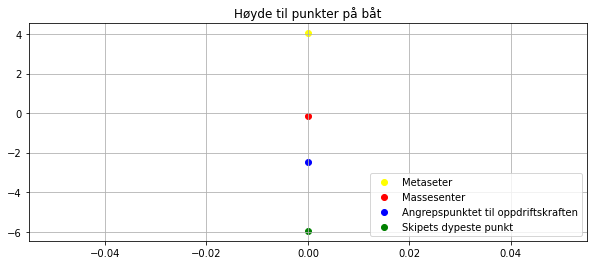

In [5]:
def Y_MB(gamma=beta):
    '''
    Input: Gamma (sector angle)
    Output: 
    '''
    return R * (4*(np.sin(gamma/2)**3))/(3*(gamma-np.sin(gamma)))

#At equilibrium
yM_0 = R*np.cos(beta/2) 
yC_0 = yM_0 - h
yB_0 = yM_0 - Y_MB(beta)
yD_0 = yM_0 - R

#print(yM_0, yC_0, yB_0, yD_0)
plt.figure(figsize=(10, 4))
plt.title("Høyde til punkter på båt")
plt.scatter(0,yM_0, color = 'yellow', label = "Metaseter")
plt.scatter(0,yC_0, color = 'red', label = "Massesenter")
plt.scatter(0,yB_0, color='blue', label = "Angrepspunktet til oppdriftskraften")
plt.scatter(0,yD_0, color= 'green', label = "Skipets dypeste punkt")
plt.legend(loc='lower right')
plt.grid()
plt.show()

De fire punktene beskrevet ovenfor er her plottet langs y-aksen. De fysisike ekstremalpunktene til skipet, metasenteret og skipets dypeste punkt, ligger henholdsvis øverst og nederst. Massesenteret ligger rett under vannoverflaten, mens angrepspunktet til oppdriftskraften ligger under, men nærmest massesenteret, og over båtens dypesete punkt.

##### 1c)
Får å kunne se på bevegelsene til båten ved hjelp av numeriske metoder trenger vi en funskjon som besrkvier endringene av bevegelsene til båten. Dette gjør vi ved å sette opp en vektor $[\theta(t) \:\:\:\:\  \omega(t)]^T$. Den deriverte av denne vektoren definerer vi som $f(t,\vec{\omega})$, beskrevet av ligning (16) i oppgaveteksten, som gir oss:

$$ (t,\vec{\omega}) = \frac{d\vec{\omega}}{dt} = \frac{d}{dt}[\theta(t) \:\:\:\:\omega(t)]^T = [\frac{d\theta(t)}{dt} \:\:\:\:\ \frac{d \omega(t)}{dt}]^T$$

hvor $\frac{d\theta}{dt} = \omega$, og $\frac{d\omega}{dt}$ finnes ved ligning (12) som gir:

$$ \frac{d\omega}{dt} = \frac{\tau_B}{I_C} = -\frac{F_Bh\:sin\theta}{I_C} $$

med $F_B = \frac{1}{2}R^2(\gamma-sin\gamma) \rho _0 g$. I denne oppgaven har vi antatt at mengden fortrengt vann er konstant, som gir $A \rightarrow A_0$, og dermed at $\gamma \rightarrow \beta$.

In [6]:
t0 = 0
tend = 20
w_start = np.array([np.pi/9, 0])
theta_0 = w_start[0]
delta = 0.01


def f(t, state):
    newState = [0,0] #Lager listen som skal returneres
    F_B = 0.5*R**2 * (beta-np.sin(beta))*sigma_0*g 
    dtheta = state[1] #dtheta/dt = omega
    dw = F_B*h/I_c * np.sin(state[0]) 
    newState[0] = dtheta
    newState[1] = dw
    return np.array(newState)



##### 1d) 

Først beskriver vi $\vec{f}(t, \vec{\omega})$ ved eulers metode:

$$ \vec{\omega}_{i+1} = \vec{\omega}_i+h\vec{f}(t_i,\vec{\omega}_i) $$

som er implementer i kodeblokken under.

In [7]:
def euler_step(f, t_i, w_i, h):
    return t_i + h, w_i + h * f(t_i, w_i)

def ode_solver(f, x0, xend, y0, h=0.01, method=euler_step):
    '''
    Solves non linear equations using a given method
    Input: 
        f - function to solve
        x0 - start value, (t0)
        xend - the last x-value
        y0 - start value for y axis
        h - step length
        method
    Output: 
        two arrays containing x-values and corresponging y-values. 
    '''
    #initialisere 
    x_num = np.array([x0])
    y_num = np.array([y0])
    xn = x0
    yn = y0

    while xn <= xend:
        xn, yn = method(f, xn, yn, h) #Do one step
        y_num = np.concatenate((y_num, np.array([yn])))
        x_num = np.append(x_num,xn)
        
    return x_num, y_num

For å bestemme en passende skrittlengde _h_ for oppgaven plotter vi her for flere _h_-verdier, og ser hvor stor den kan være uten at vi har en synlig differanse fra veldig små h-verdier. Bruker startverdiene $\theta(t=0)=20^\circ$ og $\omega(t=0)=0$. For å observere differanser er det i første omgang plottet opp til $t = 100$.  

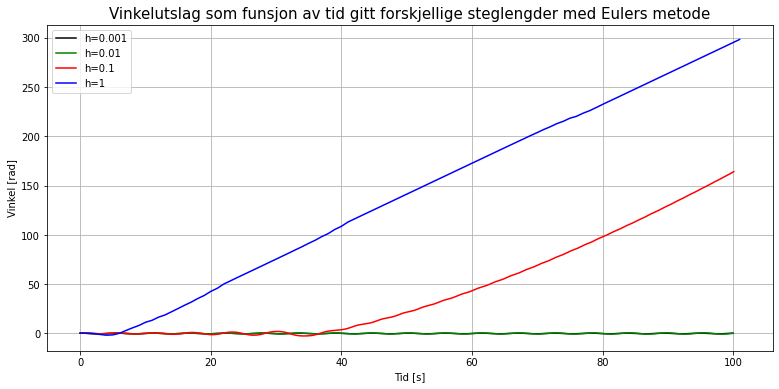

In [8]:
start_state = np.array([np.pi/9, 0]) #Startverdier
x0 = 0
tend = 100

x2,y2 = ode_solver(f, x0, tend, start_state, 0.001, euler_step)
x3,y3 = ode_solver(f, x0, tend, start_state, 0.01, euler_step)
x4,y4 = ode_solver(f, x0, tend, start_state, 0.1, euler_step)
x5,y5 = ode_solver(f, x0, tend, start_state, 1, euler_step)

theta2, theta3, theta4, theta5 = [], [], [], []
w2, w3, w4, w5 = [], [], [], []
for i in range(len(x2)): 
    theta2.append(y2[i][0])
    w2.append(y2[i][1])
for i in range(len(x3)): 
    theta3.append(y3[i][0])
    w3.append(y3[i][1])
for i in range(len(x4)): 
    theta4.append(y4[i][0])
    w4.append(y4[i][1])
for i in range(len(x5)): 
    theta5.append(y5[i][0])
    w5.append(y5[i][1])


plt.figure(figsize=(13, 6))
plt.title("Vinkelutslag som funsjon av tid gitt forskjellige steglengder med Eulers metode", size =15)
plt.ylabel("Vinkel [rad]")
plt.xlabel("Tid [s]")
plt.plot(x2,theta2, color = 'black', label = 'h=0.001')
plt.plot(x3,theta3, color = 'green', label = 'h=0.01')
plt.plot(x4,theta4, color = 'red', label = 'h=0.1')
plt.plot(x5,theta5, color = 'blue', label = 'h=1')
plt.legend()
plt.grid()

Med $h =1$ og $h = 0.1$ ser fort store forskjeller fra små h-verdeier. $h = 0.01$ ligger tilnærmet over plottet til $h = 0.001$, og ser dermed at $h = 0.01$ er en liten nok skrittlengde for disse utregningene. 

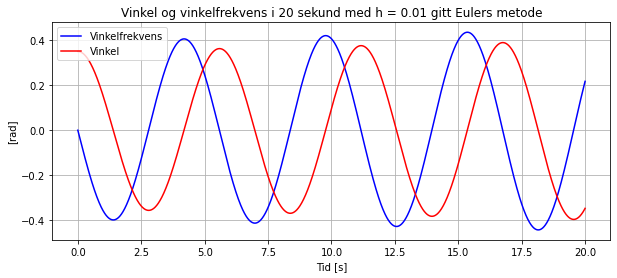

In [9]:
w_start = np.array([np.pi/9, 0])
x,y = ode_solver(f, 0, 20, w_start, 0.01, euler_step)

theta = []
w = []
for state in y: 
    theta.append(state[0])
    w.append(state[1])



plt.figure(figsize=(10, 4))
plt.title("Vinkel og vinkelfrekvens i 20 sekund med h = 0.01 gitt Eulers metode")
plt.plot(x, w, color = 'blue', label = "Vinkelfrekvens")
plt.plot(x, theta, color = 'red', label = "Vinkel")
plt.xlabel("Tid [s]")
plt.ylabel("[rad]")
plt.legend()
plt.grid()

Over er vinkelfrekvens og vinkel plottet med $h = 0.01$. Vi ser en fin periodiske bevegelse til både $\theta$ og $\omega$. Plottet ser også fornuftig ut da $\frac{d\theta}{dt} = \omega$, og begge oscellerer om null. 

##### 1f) 
Under er  fjerde ordens Runge-Kuttas metode implementert med: 

$$ \vec{k_1} = \vec{f}(t_i, \vec{ \omega _i}) $$

$$ \vec{k_2} = \vec{f}(t_i + \frac{h}{2}, \vec{ \omega _i} + h\frac{\vec{k_1}}{2})$$

$$ \vec{k_3} = \vec{f}(t_i + \frac{h}{2}, \vec{ \omega _i} + h\frac{\vec{k_2}}{2})$$

$$ \vec{k_4} = \vec{f}(t_i + h, \vec{ \omega _i} + h\vec{k_3})$$

og 

$$\vec{\omega _{i+1}} = \vec{\omega _i} + \frac{h}{6} (\vec{k_1} + 2 \vec{k_2} + 2 \vec{k_3}+\vec{k_4}) $$
 

In [10]:
def RK4_step(f, t_i, w_i, h):
    ''' 
    One step using Runge_kutta
    Intput: 
        w_i: [angle theta, frequency ohmega], 
        t_i: time
        h: step length
        f: function to be solved
    Return: next function value
    '''
    k1 = f(t_i,w_i)
    k2 = f(t_i + h/2, w_i + h*k1/2)
    k3 = f(t_i + h/2, w_i + h*k2/2)
    k4 = f(t_i+ h, w_i + h*k3)

    return t_i + h,  w_i + h/6 *(k1+ 2*k2 + 2*k3 + k4)


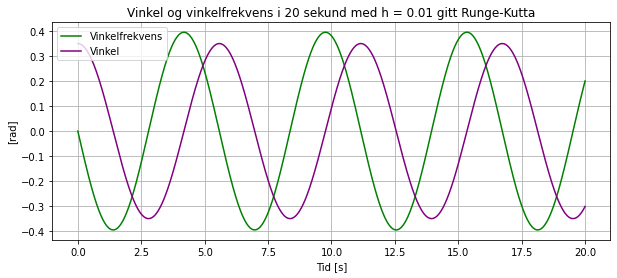

In [11]:
w_start = np.array([np.pi/9, 0])
x,y = ode_solver(f, 0, 20, w_start, 0.01, RK4_step)

theta = []
w = []
for state in y: 
    theta.append(state[0])
    w.append(state[1])



plt.figure(figsize=(10, 4))
plt.title("Vinkel og vinkelfrekvens i 20 sekund med h = 0.01 gitt Runge-Kutta")
plt.plot(x, w, color = 'green', label = "Vinkelfrekvens")
plt.plot(x, theta, color = 'purple', label = "Vinkel")
plt.xlabel("Tid [s]")
plt.ylabel("[rad]")
plt.legend()
plt.grid()

##### 1g) 

-0.01510652923149681
[[ 0.01745329  0.        ]
 [ 0.01745329 -0.0002248 ]
 [ 0.01745104 -0.0004496 ]
 ...
 [-0.01539298  0.01422353]
 [-0.01525075  0.01442179]
 [-0.01510653  0.01461823]]


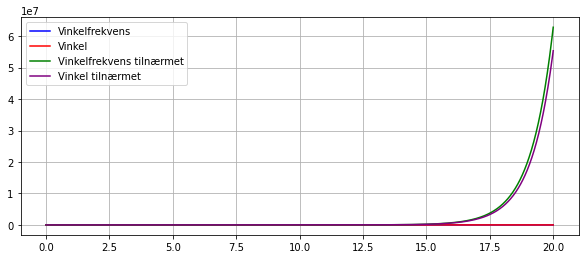

In [12]:
#Lager en funksjon som løser ligning 10 numerisk.

def f_forenklet(t, state):
    newState = [0,0]
    dtheta = state[1]
    dw = -m*g*h*state[0] / I_c
    newState[0] = dtheta
    newState[1] = dw
    return np.array(newState)

w_start = [np.pi/180, 0]

x,y = ode_solver(f, 0, 20, w_start, 0.01, euler_step)
print(y[-1][0])
print(y)
theta = []
w = []
for state in y: 
    theta.append(state[0])
    w.append(state[1])

x2, y2 = ode_solver(f_forenklet, 0, 20, w_start, 0.01, euler_step)

theta2 = []
w2 = []
for state in y2: 
    theta2.append(state[0])
    w2.append(state[1])

plt.figure(figsize=(10, 4))
plt.plot(x, w, color = 'blue', label = "Vinkelfrekvens")
plt.plot(x, theta, color = 'red', label = "Vinkel")
plt.plot(x, w2, color = 'green', label = "Vinkelfrekvens tilnærmet")
plt.plot(x, theta2, color = 'purple', label = "Vinkel tilnærmet")
plt.legend()
plt.grid()

Med småvinkeltilnærming får vi likning 10 i oppgavedokumentet: 

$-mgh\theta = I_c \cdot \ddot{\theta} $

Den analytiske løsningen er da på formen:


$\tilde{\theta} =  A \cdot sin \left(\sqrt{\frac{mgh}{I_c}}  \cdot t \right) + B \cdot cos \left(\sqrt{\frac{mgh}{I_c}} \cdot t \right) $

Deretter må vi bruke initialverdiene: [0.01 rad, 0] for $\theta$ og $\omega$ i t = 0.

Med t=0 vil sinusleddet være 0, så det er cosinus-leddet vi er interessert i. cos(0) = 1, så B må være 0.01rad.

C:\Users\3rlen\AppData\Local\Temp\ipykernel_7372\3427350264.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_RK4, w_RK4,'g--', color = 'green', label = "RK4 omega")
C:\Users\3rlen\AppData\Local\Temp\ipykernel_7372\3427350264.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_euler, theta_euler, 'r--', color = 'red', label = "Euler theta")


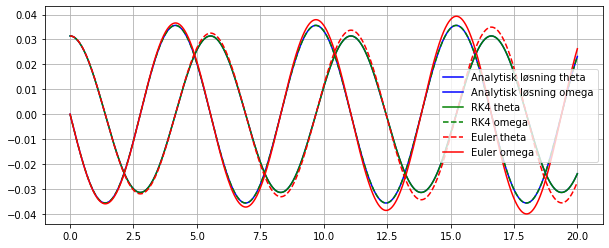

In [13]:
t = np.linspace(0, 1, 200)

def theta_tilde(t, w_start):
    return  [w_start[0]*np.cos(np.sqrt(-m*g*h/I_c)*t),-np.sqrt(-m*g*h/I_c) * w_start[0]*np.sin(np.sqrt(-m*g*h/I_c)*t) ]

w_start = [np.pi * 0.01, 0]

x_euler,y = ode_solver(f, 0, 20, w_start, 0.01, euler_step)
x_RK4,y2 = ode_solver(f, 0, 20, w_start, 0.01, RK4_step)

y_tilde_theta, y_tilde_omega = theta_tilde(x_euler,w_start)
#print(y_tilde)
theta_euler = []
w_euler = []
for state in y: 
    theta_euler.append(state[0])
    w_euler.append(state[1])

theta_RK4 = []
w_RK4 = []
for state in y2: 
    theta_RK4.append(state[0])
    w_RK4.append(state[1])

#print(len(x_euler), len(x_RK4), len(y_tilde))

plt.figure(figsize=(10, 4))
plt.plot(x_euler, y_tilde_theta, color = 'blue', label = "Analytisk løsning theta")
plt.plot(x_euler, y_tilde_omega, color = 'blue', label = "Analytisk løsning omega")

plt.plot(x_RK4, theta_RK4, color = 'green', label = "RK4 theta")
plt.plot(x_RK4, w_RK4,'g--', color = 'green', label = "RK4 omega")


plt.plot(x_euler, theta_euler, 'r--', color = 'red', label = "Euler theta")
plt.plot(x_euler, w_euler, color = 'red', label = "Euler omega")
    

plt.legend()
plt.grid()


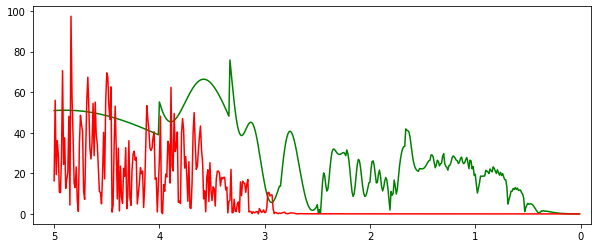

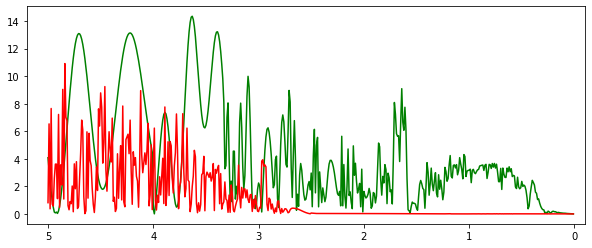

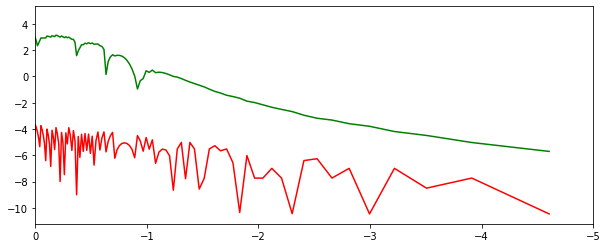

In [14]:
import scipy.optimize as opt

"""
def getDifferance(y2,y2):
    differanceVec = []
    for i in range(len(x)):
        diff = y[i] - y2[i]
        differanceVec.append(diff)
    return differanceVec
"""
h_interval = np.arange(0.01,5.01,0.01)

w_start = [np.pi * 0.01, 0]

def endDifferances(h_interval):
    x = h_interval
    euler_theta_ends = []
    RK4_theta_ends = []
    tilde_theta_end = y_tilde_theta[-1]
    euler_omega_ends = []
    RK4_omega_ends = []
    tilde_omega_end = y_tilde_omega[-1]

    for h_i in h_interval:
        x_euler,y_euler = ode_solver(f, 0, 20, w_start, h_i, euler_step)
        x_RK4, y_RK4 = ode_solver(f, 0, 20, w_start, h_i, RK4_step)

        y_euler_theta_end = y_euler[-1][0]
        y_RK4_theta_end = y_RK4[-1][0]
        y_euler_omega_end = y_euler[-1][1]
        y_RK4_omega_end = y_RK4[-1][1]

        euler_theta_ends.append(y_euler_theta_end)
        RK4_theta_ends.append(y_RK4_theta_end)
        euler_omega_ends.append(y_euler_omega_end)
        RK4_omega_ends.append(y_RK4_omega_end)

    euler_theta_diffs = np.absolute(euler_theta_ends - tilde_theta_end)
    RK4_theta_diffs = np.absolute(RK4_theta_ends - tilde_theta_end)
    euler_omega_diffs = np.absolute(euler_omega_ends - tilde_omega_end)
    RK4_omega_diffs = np.absolute(RK4_omega_ends - tilde_omega_end)
    
    return x, euler_theta_diffs, RK4_theta_diffs, euler_omega_diffs, RK4_omega_diffs

x, euler_theta_diffs, RK4_theta_diffs, euler_omega_diffs, RK4_omega_diffs = endDifferances(h_interval)

logs = np.array([x, euler_theta_diffs, RK4_theta_diffs, euler_omega_diffs, RK4_omega_diffs])

x_log, euler_theta_diffs_log, RK4_theta_diffs_log, euler_omega_diffs_log, RK4_omega_diffs_log = np.log(logs)

#print(x_log, euler_theta_diffs_log, RK4_theta_diffs_log, euler_omega_diffs_log, RK4_omega_diffs_log)

#print(x, euler_theta_diffs, RK4_theta_diffs, euler_omega_diffs, RK4_omega_diffs)

#opt.curve_fit(ode_solver(f, 0, 20, w_start, 0.01, euler_step), x,euler_diffs)
plt.figure(figsize=(10, 4))        
plt.plot(x, euler_theta_diffs, color = 'green', label = "Euler theta differanse")
plt.plot(x, RK4_theta_diffs, color = 'red', label = "RK4 theta differanse")
plt.xlim(5.2,-0.1)
plt.show()

plt.figure(figsize=(10, 4))        
plt.plot(x, euler_omega_diffs, color = 'green', label = "Euler omega differanse")
plt.plot(x, RK4_omega_diffs, color = 'red', label = "RK4 omgega differanse")
plt.xlim(5.2,-0.1)

plt.show()

plt.figure(figsize=(10, 4))        
plt.plot(x_log, euler_theta_diffs_log, color = 'green', label = "Euler theta differanse")
plt.plot(x_log, RK4_theta_diffs_log, color = 'red', label = "RK4 theta differanse")
plt.xlim(0,-5)

plt.show()

## Oppgave 2

#### 2)

Velger å inkludere alle krefter og dreiemomenter med en gang. 

Definerer state vektoren som:
$$[\dot{x}, \dot{y}, x, y, \dot{\theta}, \theta, \dot{s_L}, s_L]$$

Der x, y er henholdsvis posisjonen til masse senteret til båten og $s_L$ er posisjonen til lasten fra punktet M.

In [104]:
y_M0 = R * np.cos(beta / 2)
y_C0 = y_M0 - h
y_B0 = y_M0 - Y_MB()
y_D0 = y_M0 - R

class Enviroments:
    def __init__(self, k_f=0.8, mu_last=0.2, F_0 = 0, w_w =0):
        self.k_f = k_f #water friction coef.
        self.mu_last = mu_last #load friction coef.
        self.F_0 = F_0 #wind force amplitude
        self.w_w = w_w #wind force frequency

In [159]:
class BoatDynamics:
    def __init__(self, fence, loadmass, theta_area, env):
        #enviroments. Such as wind, friction coefficients etc.¨
        self.env = env

        #simulation parameters
        self.fence = fence #bolean. Fences on boat sides.
        self.loadmass = loadmass #mass of load beeing caried
        self.theta_area = theta_area #sier om vi skal regne på areal som funksjon av theta

        #some events:
        self.load_at_rest = False #tells the load to rest.
        self.load_of_board = False  #load has fallen ofboard.
        self.boat_tipped = False #boat has tipped

    def f(self, t, state):

        #derivert av state:
        state_dot = np.zeros(len(state))
        
        #pakker ut state vektoren
        x_dot, y_dot = state[0], state[1]
        x, y = state[2], state[3]
        theta_dot = state[4]
        theta = state[5]
        s_Ldot = state[6]
        s_L = state[7]

        beta = get_beta(self.loadmass)
        A0 = 0.5 * R**2 * (beta - np.sin(beta))

        delta_y = y - (R * np.cos(beta / 2) - h) # y - y_C0, tyngde punktets relative bevegelse.

        #sektor vinkel:
        gamma = 2 * np.arccos(np.cos(beta/2) - 4 / (3 * np.pi) * (1 - np.cos(theta)) + delta_y / R)
 
        #krefter på lasten + litt logikk for bevegelse med gjerde
        if(self.loadmass != 0):
            friction_x =  self.env.mu_last * self.loadmass * abs(g) * np.cos(theta) #friksjon på lasten
            gravity_x =  self.loadmass * abs(g) * np.sin(theta) #tyngdekraft på lasten
            
            F_sx = - np.sign(theta) * abs(friction_x) + np.sign(theta) * abs(gravity_x)
            F_sy = - self.loadmass * abs(g) * np.cos(theta) #y-komponent
            F_Ly = - self.loadmass * abs(g) * (np.cos(theta))**2 #kontakt kraft fra last i x retning
            F_Lx = self.loadmass * abs(g) * np.cos(theta) * np.sin(theta) # -=- i y retning.

            if(abs(s_L) >= R and self.fence):
                if(abs(theta) > 0.03 or np.sign(s_Ldot) == np.sign(theta)):
                    self.load_at_rest = True

                    F_sx = 0
                    s_Ldot = 0

                else:
                    self.load_at_rest = False

            elif(abs(s_L) >= R and not self.fence):
                self.load_of_board = True

        else:
            s_Ldot, F_sx, F_sy, F_Ly, F_Lx = 0, 0, 0, 0, 0 #Ingen last til å begynne med
        
        if(self.load_of_board):
            self.loadmass = 0
            s_Ldotdot, F_sx, F_sy, F_Ly, F_Lx = 0, 0, 0, 0, 0
        
        #areal
        if(self.theta_area): A = 0.5 * R**2 * (gamma - np.sin(gamma)) #fortrengt vann
        else: A = 0.5 * R**2 * (beta - np.sin(beta)) #ikke fortrengt vann

        #krefter på båten:
        F_B = A * sigma_0 * abs(g) #boyuansy force. Fancy french
        F_G = - (m + self.loadmass) * abs(g) #gravity
        f_small = - self.env.k_f * R * gamma * theta_dot #friksjons kraft fra vannet på båten
        F_w = self.env.F_0 * np.cos(self.env.w_w * t) #kraft fra vind

        #dreie momenter:
        tau_B = - F_B * h * np.sin(theta) #dreiemoment fra bouyancy kraft
        tau_f = f_small * (y - (R * (np.cos(gamma/2)) - 1))
        tau_w = F_w * y
        tau_L = F_sy * s_L

        #regner ut summen av kreftene på båten: 
        F_sum_x = f_small + F_w + F_Lx #newtons
        F_sum_y = F_G + F_B + F_Ly #newtons

        #regner ut summen av dreiemomenter på båten:
        tau_sum = tau_B + tau_f + tau_w + tau_L

        #lager ny state:
        state_dot[0] = F_sum_x / m  #akselerasjon i x retning
        state_dot[1] = F_sum_y / m  #akselerasjon i y retning
        state_dot[2] = x_dot #x -> xdot
        state_dot[3] = y_dot #y -> ydot
        state_dot[4] = tau_sum / I_c  #theta_dot -> theta_dotdot
        state_dot[5] = theta_dot #theta -> theta_dot

        if(self.loadmass != 0): state_dot[6] = F_sx / self.loadmass
        else: state_dot[6] = 0

        state_dot[7] = s_Ldot

        #sjekker for kantring:
        if(abs(theta) > (np.pi - gamma) / 2):
            self.boat_tipped = True

        return state_dot

In [160]:
def solve_boat_dynamics(x0, xend, y0, mass_load = 0.01*m, theta_area=True, fence=True, h=0.01, method=RK4_step, env=Enviroments()):
    if(len(y0) != 8): #om init state er mindre enn 8 legger vi til 0 på resten.
        for _ in range(8 - len(y0)):
            y0.append(0)
        
    tipped = False #har disse her slik at vi kun printer at båten har tippet en gang.
    load_ofboard = False

    dynamics = BoatDynamics(fence, mass_load, theta_area, env) #lager dynamikk objektet gitt om vi skal ha gjerde, last eller ta hensyn til at 
    #arealet endrer seg som funksjon av theta. Slik oppgaven spurte om i 2b.

    #initialiserer
    x_num = np.array([x0])
    y_num = np.array([y0])
    xn = x0
    yn = y0
    
    while xn <= xend:
        #sjekker flagg:
        if(dynamics.load_at_rest):
            yn[6] = 0 #setter lastens hastigheten til 0 om ode sier at lasten hviler.
        if(dynamics.load_of_board):
            yn[6], yn[7] = 0, 0 #setter posisjon og hastighet til 0. Massen blir satt til 0 i ode.
            if(not load_ofboard): #printer til konsoll
                load_ofboard = True
                print("Load fell of board at", round(xn, 3), "s")
        if(dynamics.boat_tipped):
            yn =  np.array([0, 0, yn[2], yn[3], 0, np.sign(yn[5])*np.pi / 2, 0, 0]) #lager ny state som er "flipped"
            xn += h
            if(not tipped): #printer til konsoll
                print("Boat tipped at", round(xn, 3), "s")
                tipped = True
        if(not dynamics.boat_tipped): #om båten ikke har flipper gjør vi en ny numerisk beregning:
            xn, yn = method(dynamics.f, xn, yn, h) #Do one step

        y_num = np.concatenate((y_num, np.array([yn]))) #legger til ny state i container.
        x_num = np.append(x_num,xn)
    
    if(not tipped): #printer viktige events:
        print("Boat did not tip during the simulation.")
    if(not load_ofboard and dynamics.loadmass != 0):
        print("Load mass did not fall over board.")

    return  x_num, y_num

In [161]:
def plot_solver_data(tid, states, txt=""): #plots the evolution of the state
    fig, axs = plt.subplots(4, 2,figsize = (10, 8))
    fig.suptitle(txt, fontsize=16)
    headers = {0:"x_dot", 1:"y_dot", 2:"x", 3:"y", 4:"theta_dot", 5:"theta", 6:"x_dot last", 7:"x last"}

    index = 0
    for i in range(4):
        for j in range(2):
            axs[i][j].plot(tid, states[:, index])
            axs[i][j].set_title(headers[index])
            index += 1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


#### 2b)

Ingen last masse. Ser på forskjellen med bruk av areal som funksjon av theta vs ikke funksjon av theta. Setter initial state som [] da skaper solve_boat_dynamics en state med kun 0 elementer. Dette blir mer for å teste om det funker

In [162]:
xs_A0, ys_A0 = solve_boat_dynamics(0, 30, [], mass_load = 0, fence=False, theta_area=False, h=0.01, method=euler_step)
xs, ys = solve_boat_dynamics(0, 30, [], mass_load = 0, fence=False, theta_area=True, h=0.01, method=euler_step)

Boat did not tip during the simulation.
Boat did not tip during the simulation.


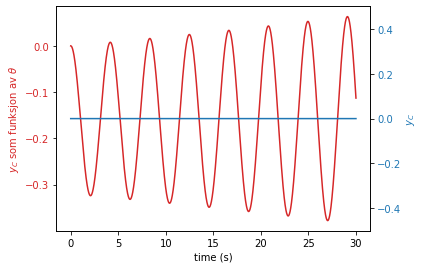

In [163]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r"$y_C$ som funksjon av $\theta$", color=color)
ax1.plot(xs, ys[:, 3], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r"$y_C$", color=color)  # we already handled the x-label with ax1
ax2.plot(xs_A0, ys_A0[:, 3], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.ylim([-0.5, 0.5])
plt.title("")
plt.show()

Vi ser her at om man inkluderer at arealet skal være en funksjon av theta begynner båten å vugge i y retning. 

#### 2c)
Implementert i solve_boat_dynamics() og BoatDynamics klassen


#### 2d)
implementert i solve_boat_dynamics() BoatDynamics klassen.

plotter $\theta$ og $s_L$ vs tid:

In [164]:
y0 = [0, 0, 0, 0, 0.2, 0, 0, 3] #=[vx, vy, x, y, omega=0.2, theta, vs, s=3]
xs0, ys0 = solve_boat_dynamics(0, 30 , y0, mass_load= 0.001 * m, fence=False)

Load fell of board at 11.6 s
Boat did not tip during the simulation.


In [165]:
def plot2d(xs, ys):
    fig, axs = plt.subplots(1, 2)
    upper = [R for _ in range(len(xs))]
    lower = [-R for _ in range(len(xs))]
    axs[0].plot(xs, ys[:, 5], label="theta")
    axs[1].plot(xs, ys[:, 7])
    axs[1].fill_between(xs, lower, upper, color="grey", alpha=0.3)
    axs[1].plot(xs, upper, color="darkgray", label="|R|")
    axs[1].plot(xs, lower, color="darkgray")
    axs[0].legend()
    axs[1].legend(loc=1)
    plt.show()

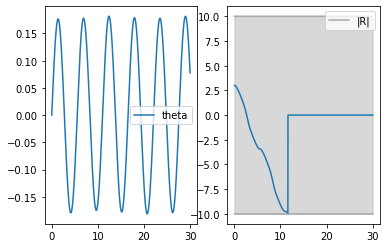

In [166]:
plot2d(xs0, ys0)

I plottet over ser vi hvordan theta endrer seg over tid. Lasten faller av etter 11.6 sekunder. Som visualisert er det grå område båtens overflate. Som standard i funksjonene våres settes posisjonen og massen til 0 når båten faller av båten. 

#### 2e)

Koden for inkludering av gjerdet er implementert i koden over. Gjør en ny simulering med gjerdet:

Boat did not tip during the simulation.
Load mass did not fall over board.


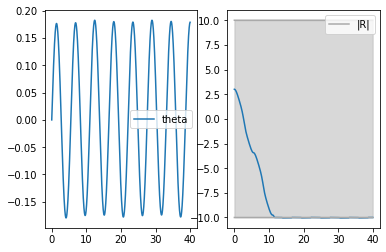

In [168]:
y0 = [0, 0, 0, 0, 0.2, 0, 0, 3] #=[vx, vy, x, y, omega=0.2, theta, vs, s=3]
xs1, ys1 = solve_boat_dynamics(0, 40 , y0, mass_load= 0.001 * m, fence=True)
plot2d(xs1, ys1)

AttributeError: 'NoneType' object has no attribute 'to_html5_video'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51ce7be8-9a96-4da6-a73f-5c8b71a15bb7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>